In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [3]:
place_holder = './'

In [4]:
subscriptions = pd.read_csv('subscriptionsdataFINAL.csv')
subscriptions.head()

Club Join Date Affluence  Gender Subscription Type End Date  \
0    Enfield    Dec-11        C1    Male          Standard   Dec-11   
1  Greenwich    Jun-18         A  Female          Standard      NaN   
2  Islington    Mar-18         B  Female          Standard   Oct-18   
3   Hounslow    Oct-15        C1  Female          Standard   Dec-15   
4     Barnet    May-15        C2    Male          Standard   Dec-15   

   CustomerID  BirthYear  
0           1       1992  
1           2       1972  
2           3       1985  
3           4       1972  
4           5       1982

In [5]:
visitation1 = pd.read_csv('visitationdataPART1.csv')
visitation2 = pd.read_csv('visitationdataPART2.csv')

## Membership Growth Rate

In [6]:
#convert the join and end date to_date
subscriptions['Join Date'] =  pd.to_datetime(subscriptions['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions['End Date'] =  pd.to_datetime(subscriptions['End Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions

Club  Join Date Affluence  Gender Subscription Type  \
0             Enfield 2011-12-01        C1    Male          Standard   
1           Greenwich 2018-06-01         A  Female          Standard   
2           Islington 2018-03-01         B  Female          Standard   
3            Hounslow 2015-10-01        C1  Female          Standard   
4              Barnet 2015-05-01        C2    Male          Standard   
...               ...        ...       ...     ...               ...   
850028       Lewisham 2018-12-01         A    Male          Standard   
850029  Tower Hamlets 2013-10-01         B    Male          Standard   
850030      Redbridge 2018-05-01        C1  Female          Standard   
850031         Camden 2017-07-01         B  Female          Standard   
850032      Greenwich 2015-10-01        C1    Male          Standard   

         End Date  CustomerID  BirthYear  
0      2011-12-01           1       1992  
1             NaT           2       1972  
2      2018-10-01           3       1985  
3      2015-12-01           4       1972  
4      2015-12-01           5       1982  
...           ...         ...        ...  
850028        NaT      850029       1995  
850029 2014-02-01      850030       1987  
850030 2018-09-01      850031       1985  
850031 2017-09-01      850032       1978  
850032 2015-12-01      850033       1989  

[850033 rows x 8 columns]

In [7]:
date_min = min (subscriptions['Join Date'].min(),subscriptions['End Date'].min() )
date_max = max (subscriptions['Join Date'].max(),subscriptions['End Date'].max() )
date_min, date_max

(Timestamp('2009-05-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [8]:
all_dates = pd.date_range(date_min, date_max, freq = 'Y')
#all_dates = pd.date_range(date_min, date_max, freq = 'M')
all_dates

DatetimeIndex(['2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [9]:
# fill nan values with the lates dates
subscriptions['End Date'] = subscriptions['End Date'].fillna(date_max)
subscriptions[all_dates] = pd.concat([((subscriptions['Join Date'] <= i) & (i <= subscriptions['End Date'])).astype(int) for i in all_dates], axis=1)

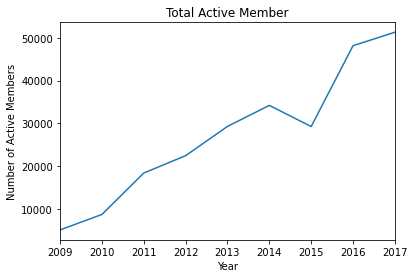

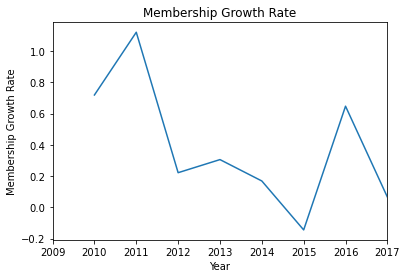

In [10]:
def plot_traits(subscriptions,col_name = ''):
    if col_name!='':
        s = subscriptions.groupby(col_name)[all_dates].sum().T 
    else:
        s = subscriptions[all_dates].sum().T 
    s.plot()
    plt.title('Total Active Member')
    plt.xlabel('Year')
    plt.ylabel('Number of Active Members')
    plt.show()
    s = (s-s.shift(1))/s.shift(1)
    s.plot()
    plt.title('Membership Growth Rate')
    plt.xlabel('Year')
    plt.ylabel('Membership Growth Rate')
    plt.show()
    return None

plot_traits(subscriptions)

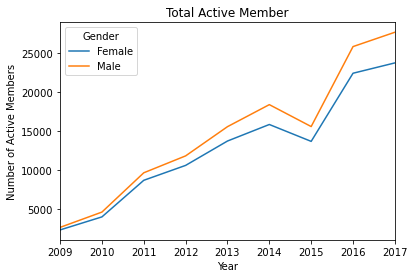

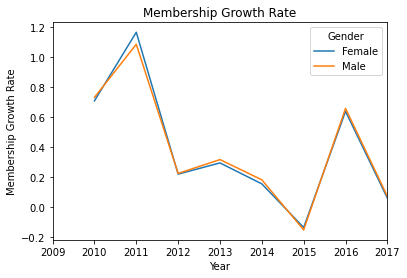

In [11]:
plot_traits(subscriptions,'Gender')

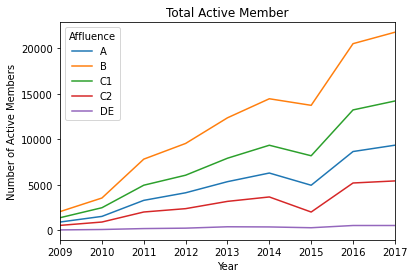

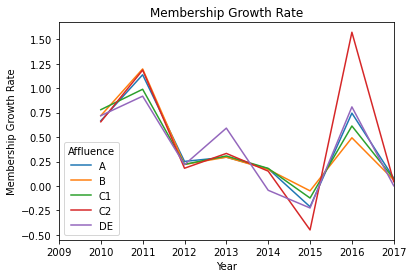

In [12]:
plot_traits(subscriptions,'Affluence')

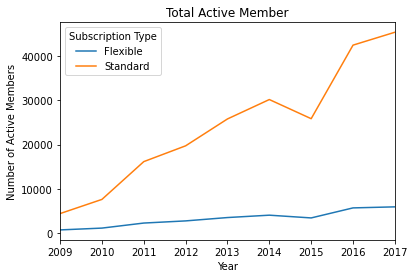

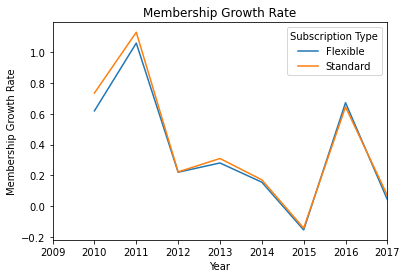

In [13]:
plot_traits(subscriptions,'Subscription Type')

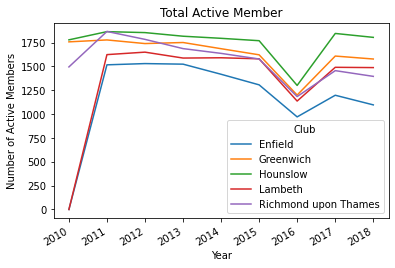

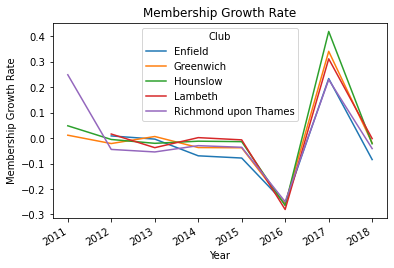

In [14]:
df = subscriptions.groupby('Club').sum()[all_dates[:2]]
interested_firms = df.loc[(df!=0).any(1)].index
df = subscriptions.groupby('Club').sum()
s = df.loc[df.index.isin(interested_firms)][all_dates].T
s.plot()
plt.title('Total Active Member')
plt.xlabel('Year')
plt.ylabel('Number of Active Members')
plt.show()
s = (s-s.shift(1))/s.shift(1)
s.plot()
plt.title('Membership Growth Rate')
plt.xlabel('Year')
plt.ylabel('Membership Growth Rate')
plt.show()

In [15]:
# join and end age
subscriptions["Join Age"] = pd.DatetimeIndex(subscriptions["Join Date"]).year - subscriptions["BirthYear"]
subscriptions['End Age'] = np.where(subscriptions['End Date'].isna(),
                                ((date_max.year - subscriptions['BirthYear']) ), 
                                (pd.DatetimeIndex(subscriptions['End Date']).year - subscriptions['BirthYear']) ).astype(int)

In [16]:
#define age buckets
age_limits = [24, 30, 40]

conditions = [
    (subscriptions['Join Age'] <= age_limits[0]),
    (subscriptions['Join Age'] > age_limits[0]) & (subscriptions['Join Age'] <= age_limits[1]),
    (subscriptions['Join Age'] > age_limits[1]) & (subscriptions['Join Age'] <= age_limits[2]),
    (subscriptions['Join Age'] > age_limits[2])     ]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4']

subscriptions['Join Age Tier'] = np.select(conditions, values)

In [17]:
subscriptions.groupby('Join Age Tier').count()

Club  Join Date  Affluence  Gender  Subscription Type  \
Join Age Tier                                                            
tier_1         180408     180408     180408  180408             180408   
tier_2         231808     231808     231808  231808             231808   
tier_3         334787     334787     334787  334787             334787   
tier_4         103030     103030     103030  103030             103030   

               End Date  CustomerID  BirthYear  2009-12-31 00:00:00  \
Join Age Tier                                                         
tier_1           180408      180408     180408               180408   
tier_2           231808      231808     231808               231808   
tier_3           334787      334787     334787               334787   
tier_4           103030      103030     103030               103030   

               2010-12-31 00:00:00  2011-12-31 00:00:00  2012-12-31 00:00:00  \
Join Age Tier                                                                  
tier_1                      180408               180408               180408   
tier_2                      231808               231808               231808   
tier_3                      334787               334787               334787   
tier_4                      103030               103030               103030   

               2013-12-31 00:00:00  2014-12-31 00:00:00  2015-12-31 00:00:00  \
Join Age Tier                                                                  
tier_1                      180408               180408               180408   
tier_2                      231808               231808               231808   
tier_3                      334787               334787               334787   
tier_4                      103030               103030               103030   

               2016-12-31 00:00:00  2017-12-31 00:00:00  Join Age  End Age  
Join Age Tier                                                               
tier_1                      180408               180408    180408   180408  
tier_2                      231808               231808    231808   231808  
tier_3                      334787               334787    334787   334787  
tier_4                      103030               103030    103030   103030

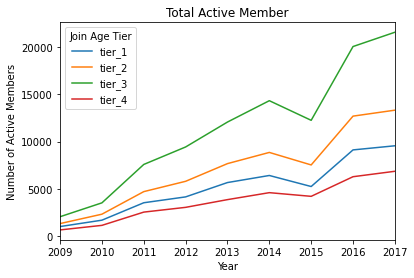

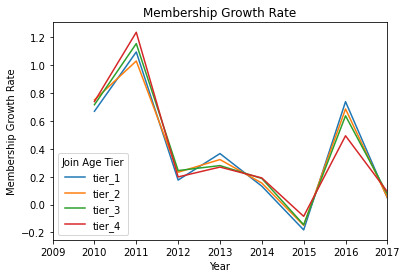

In [18]:
plot_traits(subscriptions,'Join Age Tier')

In [61]:
# Membership Status
subscriptions['Status']=np.where(subscriptions['End Date'].isna(),"Yes","No")
subscriptions

Club  Join Date Affluence  Gender Subscription Type  \
0             Enfield 2011-12-01        C1    Male          Standard   
1           Greenwich 2018-06-01         A  Female          Standard   
2           Islington 2018-03-01         B  Female          Standard   
3            Hounslow 2015-10-01        C1  Female          Standard   
4              Barnet 2015-05-01        C2    Male          Standard   
...               ...        ...       ...     ...               ...   
850028       Lewisham 2018-12-01         A    Male          Standard   
850029  Tower Hamlets 2013-10-01         B    Male          Standard   
850030      Redbridge 2018-05-01        C1  Female          Standard   
850031         Camden 2017-07-01         B  Female          Standard   
850032      Greenwich 2015-10-01        C1    Male          Standard   

         End Date  CustomerID  BirthYear  2009-12-31 00:00:00  \
0      2011-12-01           1       1992                    0   
1      2018-12-01           2       1972                    0   
2      2018-10-01           3       1985                    0   
3      2015-12-01           4       1972                    0   
4      2015-12-01           5       1982                    0   
...           ...         ...        ...                  ...   
850028 2018-12-01      850029       1995                    0   
850029 2014-02-01      850030       1987                    0   
850030 2018-09-01      850031       1985                    0   
850031 2017-09-01      850032       1978                    0   
850032 2015-12-01      850033       1989                    0   

        2010-12-31 00:00:00  2011-12-31 00:00:00  2012-12-31 00:00:00  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
850028                    0                    0                    0   
850029                    0                    0                    0   
850030                    0                    0                    0   
850031                    0                    0                    0   
850032                    0                    0                    0   

        2013-12-31 00:00:00  2014-12-31 00:00:00  2015-12-31 00:00:00  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
850028                    0                    0                    0   
850029                    1                    0                    0   
850030                    0                    0                    0   
850031                    0                    0                    0   
850032                    0                    0                    0   

        2016-12-31 00:00:00  2017-12-31 00:00:00 Status  
0                         0                    0     No  
1                         0                    0     No  
2                         0                    0     No  
3                         0                    0     No  
4                         0                    0     No  
...                     ...                  ...    ...  
850028                    0                    0     No  
850029                    0                    0     No  
850030                    0                    0     No  
850031                    0          

In [12]:
join_dates = subscriptions['Join Date'].unique()
end_dates = subscriptions['End Date'].unique()
dates = pd.date_range(date_min, date_max, freq = 'MS')
dates

DatetimeIndex(['2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=116, freq='MS')

In [18]:
#add total month membership in dataframe subscriptions
subscriptions['Duration'] = np.where(subscriptions['End Date'].isna(), 
                                     (date_max - subscriptions['Join Date']), 
                                     (subscriptions['End Date'] - subscriptions['Join Date']) )
#convert the difference in months
subscriptions['Duration'] = (subscriptions['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)
subscriptions.head()

Club  Join Date Affluence  Gender Subscription Type   End Date  \
0    Enfield 2011-12-01        C1    Male          Standard 2011-12-01   
1  Greenwich 2018-06-01         A  Female          Standard        NaT   
2  Islington 2018-03-01         B  Female          Standard 2018-10-01   
3   Hounslow 2015-10-01        C1  Female          Standard 2015-12-01   
4     Barnet 2015-05-01        C2    Male          Standard 2015-12-01   

   CustomerID  BirthYear Status  Duration  
0           1       1992     No         0  
1           2       1972    Yes         6  
2           3       1985     No         7  
3           4       1972     No         2  
4           5       1982     No         7

In [14]:
index_date = (dates == subscriptions.iloc[3,1] ).argmax()
dates[index_date]

Timestamp('2015-10-01 00:00:00', freq='MS')

In [15]:
members_count =  [0] * len(dates)
def add_count(join_date,duration, dates, members_count):
    index = (dates == join_date).argmax()
    
    for i in range(index,index + duration+1):
        members_count[i] = members_count[i] +1 
    
    return members_count
subscriptions.apply(lambda row: add_count(row['Join Date'], row['Duration'],
                                          dates, members_count), axis=1)

0         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
1         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
2         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
3         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
4         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
                                ...                        
850028    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850029    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850030    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850031    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850032    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
Length: 850033, dtype: object

In [16]:
data = {"Date": dates, "Total_members": members_count}
members_count_by_month = pd.DataFrame(data)
members_count_by_month.head()

Date  Total_members
0 2009-05-01            699
1 2009-06-01           1203
2 2009-07-01           2309
3 2009-08-01           3082
4 2009-09-01           3714